# Week 3 Day 1. Lab 

Strictly speaking there is no lab for today. However, I wanted to share this code with you. Notice that it will collect all the Springfields in the USA. It uses  a number of interesting operations including a spatial join in order to determine the state that includes the specific Springfield highlighted on a map. I have left one optimisation for you to consider. 

The Springfields are all within the continental United States. When we view this map with Alaska, Hawaii, and Puerto Rico, this makes the continental US very small and cramped. How might we improve this figure? One way, drawing on the walkthrough, would be to crop the boundaries of the map. Another way would be to exclude these areas from the original shape file using `states_gdf = states_gdf[~states_gdf['STUSPS'].isin(['AK', 'HI', 'PR'])]`. 

- Q1. Where should we add this in the code so that it filters? Hint: it must be done in two places: `join_springfields_to_states` and `plot_springfields`. 

Also, notice that this code is a bit suboptimal in that it uses springfield_gdf, rather than a more generic "cities" within the methods. 

- Q2. How would you refactor this code so that it is not so tightly bound to "Springfield"? 
- Q3. Once refactored, what of this code would you place in a `*.py` file for utilities and what would you keep in the notebook? 

First run the code to get the map as is. It's two cells. The first is all the helper methods and the second just runs the code.


In [13]:
# Setup autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
from week3d1_helper_springfield import *

def main():
    try:
        # Create GeoDataFrame
        springfields_gdf = create_springfields_geodataframe()
        
        # Display results
        print("\nSpringfield locations with coordinates:")
        print(springfields_gdf[['city', 'state', 'latitude', 'longitude']])
        
        # Optionally save to file
        springfields_gdf.to_file("springfields.geojson", driver='GeoJSON')
        
        return springfields_gdf
        
    except Exception as e:
        print(f"Error in main execution: {e}")
        return None


Fetching Springfield disambiguation page...
Parsing Springfield locations...
Found 50 Springfield locations in US
Fetching coordinates...
Successfully retrieved coordinates for 40 locations

Found state name mismatches:
                                             title  \
0          Springfield, Albemarle County, Virginia   
4              Springfield, Dane County, Wisconsin   
9           Springfield, Jackson County, Wisconsin   
11            Springfield, LaPorte County, Indiana   
14        Springfield, Marquette County, Wisconsin   
24              Springfield, Page County, Virginia   
25              Springfield, Posey County, Indiana   
28        Springfield, St. Croix County, Wisconsin   
31         Springfield, Walworth County, Wisconsin   
33      Springfield, Westmoreland County, Virginia   
34         Springfield/Belmont, Newark, New Jersey   
37             Springfield (Coatesville, Virginia)   
39  Springfield Township, Oakland County, Michigan   

                  state

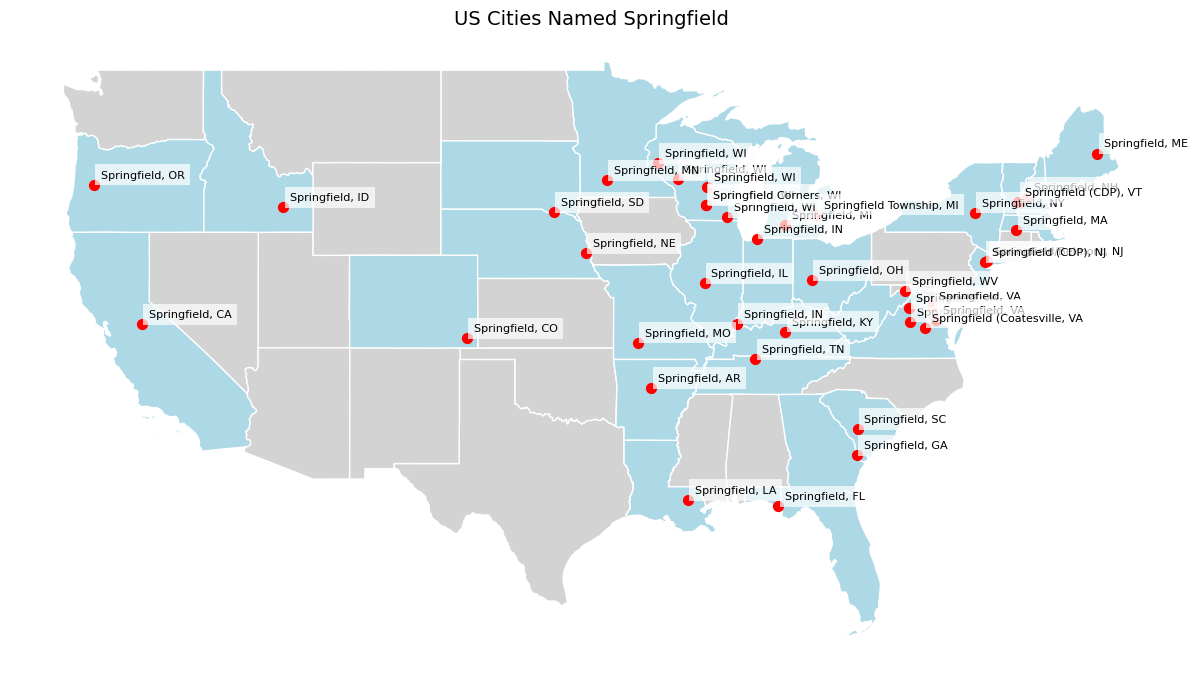

In [17]:
springfields_gdf = create_springfields_geodataframe()
    
# Perform spatial join with states
joined_gdf = join_springfields_to_states(springfields_gdf)

# Analyze distribution
state_counts = analyze_springfield_distribution(joined_gdf)

# Create and save map
fig, ax = plot_springfields(joined_gdf, save_path='figures/springfields_map.png')

The map looks very cramped. In order to make it more clear we might want to filter to the continental United States. Here is an example image when filtered correctly:

<img src="figures/springfields_map_example.png" alt="Springfields Map Example" />


Fetching Oxford (disambiguation)'s disambiguation page...
Parsing Oxford (disambiguation) locations...
Found 34 Oxford (disambiguation) locations in US
Fetching coordinates...
Successfully retrieved coordinates for 29 locations
\City Distribution by State:
        state_name state_abbrev  count
11           Maine           ME      4
8             Iowa           IA      2
19    Pennsylvania           PA      2
13   Massachusetts           MA      2
21       Wisconsin           WI      2
5          Georgia           GA      1
14        Michigan           MI      1
20   West Virginia           WV      1
2         Colorado           CO      1
18            Ohio           OH      1
17  North Carolina           NC      1
16        New York           NY      1
15        Nebraska           NE      1
3      Connecticut           CT      1
6            Idaho           ID      1
12        Maryland           MD      1
1         Arkansas           AR      1
10        Kentucky           KY      1
9 

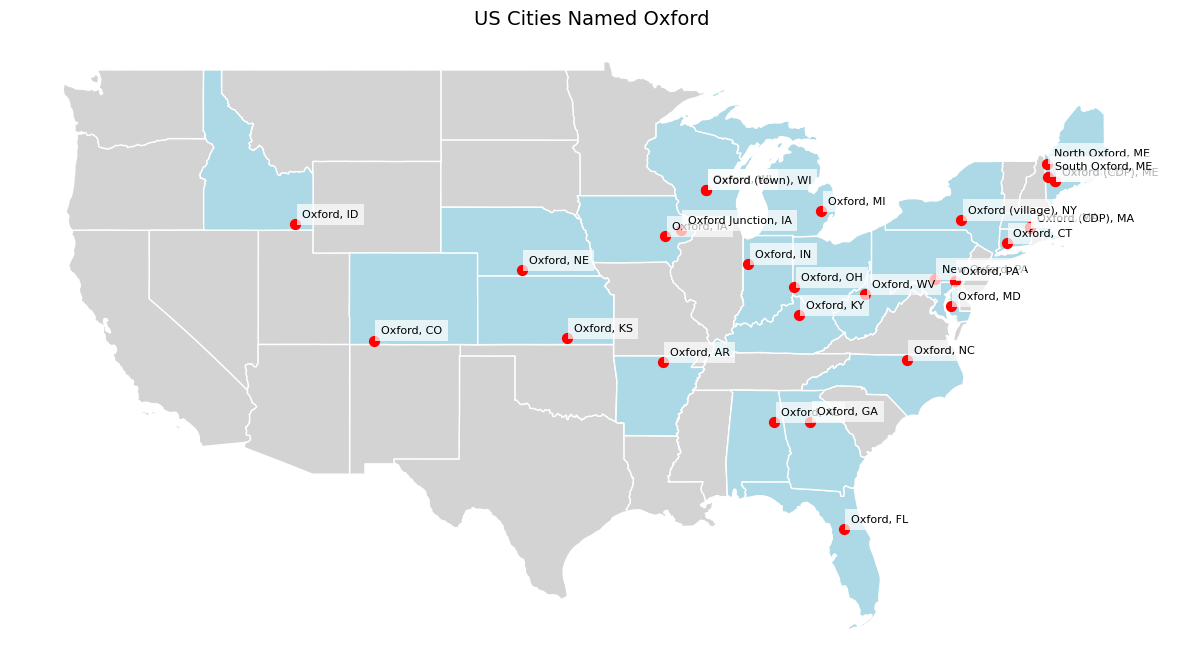

In [40]:
from week3d1_helper_general import *

cities_gdf = create_cities_geodataframe("Oxford (disambiguation)")
    
# Perform spatial join with states
joined_gdf = join_cities_to_states(cities_gdf)

# Analyze distribution
state_counts = analyze_cities_distribution(joined_gdf)

# Create and save map
fig, ax = plot_cities(joined_gdf, city_name= "Oxford", save_path=f"figures/oxfords_map.png")